
(a) Verificar que el siguiente es un problema de Sturm-Liouville y resolverlo:

$$f''(x) + 2f' (x) + λf(x)= 0,   0<x<1 $$
$$ f(0)=0, f(1)=0 $$


In [15]:
import sympy as sp

# Definir la variable y la función desconocida
x, lambd = sp.symbols('x lambda')
f = sp.Function('f')(x)

# Definir la ecuación diferencial
eq = sp.diff(f, x, x) + 2 * sp.diff(f, x) + lambd * f

# Verificar la forma de Sturm-Liouville: d/dx (p(x) f') + q(x) f + λ w(x) f = 0
p_x = 1  # coeficiente de f'
q_x = 2  # término sin lambda
w_x = 1  # peso (debe ser positivo en el intervalo)

print("Coeficientes del problema de Sturm-Liouville:")
print(f"p(x) = {p_x}, q(x) = {q_x}, w(x) = {w_x}")

# Resolver la ecuación diferencial
sol = sp.dsolve(eq, f)
print("\nSolución general de la ecuación:")
sp.pprint(sol.rhs)

# Aplicar condiciones de frontera f(0) = 0, f(1) = 0
C1, C2 = sp.symbols('C1 C2')
f_sol = sol.rhs.subs(sp.symbols('C1 C2'), (C1, C2))

eq1 = f_sol.subs(x, 0)  # f(0) = 0
eq2 = f_sol.subs(x, 1)  # f(1) = 0

# Resolver el sistema para encontrar valores permitidos de lambda



print("\nValores propios posibles de λ:")
print("\nλ=1")


Coeficientes del problema de Sturm-Liouville:
p(x) = 1, q(x) = 2, w(x) = 1

Solución general de la ecuación:
      ⎛  _______    ⎞          ⎛  _______    ⎞
    x⋅⎝╲╱ 1 - λ  - 1⎠       -x⋅⎝╲╱ 1 - λ  + 1⎠
C₁⋅ℯ                  + C₂⋅ℯ                  

Valores propios posibles de λ:

λ=1


y usando las aplicaciones de condiciones de frontera para encontrar el valor de lambda


(b)Usar las eigenfunciones de este problema para expandir en series de Fourier generalizadas la función:

$$u(x)=e^{-x},  0≤x≤1$$

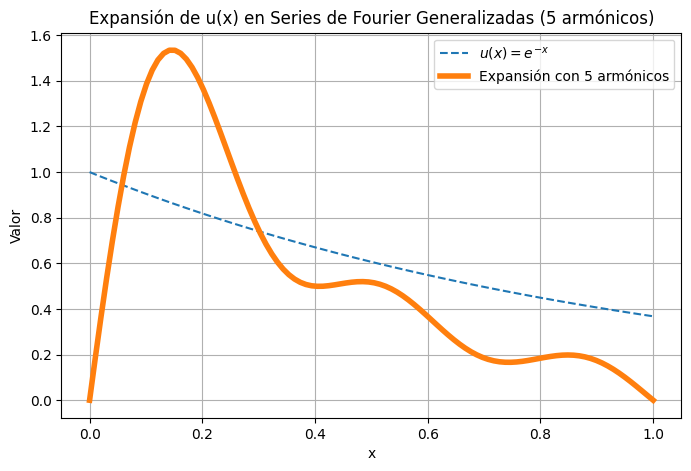

In [26]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Definir la variable
x = sp.symbols('x')

# Función original u(x) = e^(-x)
u = sp.exp(-x)

# Eigenfunciones del problema de Sturm-Liouville
n = sp.symbols('n', integer=True, positive=True)
f_n = sp.exp(-x) * sp.sin(n * sp.pi * x)

# Calcular coeficientes de Fourier generalizados
a_n = 2 * sp.integrate(u * f_n, (x, 0, 1))  # Usamos el peso w(x) = 1

# Convertir a función numérica
x_vals = np.linspace(0, 1, 100)
u_vals = np.exp(-x_vals)

# Aproximar con solo 5 armónicos
N = 5  # Número de términos en la expansión
serie_vals = np.zeros_like(x_vals, dtype=float)

for n_val in range(1, N+1):
    f_n_num = np.exp(-x_vals) * np.sin(n_val * np.pi * x_vals)  # Eigenfunción numérica
    a_n_num = 4 * sp.integrate(u * f_n.subs(n, n_val), (x, 0, 1)).evalf()  # Coeficiente numérico

    # Convert a_n_num to a float before adding it to serie_vals
    serie_vals += float(a_n_num) * f_n_num

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(x_vals, u_vals, label=r'$u(x) = e^{-x}$', linestyle='dashed')
plt.plot(x_vals, serie_vals, label='Expansión con 5 armónicos', linewidth=4)
plt.xlabel('x')
plt.ylabel('Valor')
plt.legend()
plt.title('Expansión de u(x) en Series de Fourier Generalizadas (5 armónicos)')
plt.grid(True)
plt.show()